In [2]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

# from langdetect import detect

## Filter Posts based on Langs Attribute 


### Load all posts from backup folder

In [4]:
os.getcwd()

'c:\\Users\\abels\\ITU\\BachProj\\DS_BachelorProject_PH\\notebooks'

In [ ]:
#Connect the datasets
backup_folder = "../data/backups_test/posts/"

post_files = glob.glob(os.path.join(backup_folder, "posts_backup_*.json"))

all_posts = []
for file_path in post_files:
    with open(file_path, "r",encoding='utf-8-sig') as f:
        posts = json.load(f)
        all_posts.extend(posts)


#Glob is used for pattern matching. Combines all posts into one list: all_posts. Note: Change later to several? 

print(all_posts[:5])
len(all_posts)

[{'repo': 'did:plc:n7adbgdg2ub4rem2kkr7cy2n', 'timestamp': '2025-03-24T15:37:26.436Z', 'seq': 6931993619, 'text': '4 αισθητηριακές δραστηριότητες που διευκολύνουν τον ύπνο των παιδιών\n\nhttps://e-press.gr/4-aisthitiriakes-drastiriotites-pou-diefkolynoun-ton-ypno-ton-paidion/', 'langs': None, 'cid': 'bafyreiaoww3oauyyc5jewm56fdytnvv336iwzgu27znjhugd666pvgl3iu', 'uri': 'at://did:plc:n7adbgdg2ub4rem2kkr7cy2n/app.bsky.feed.post/3ll53ktdkvj2g'}, {'repo': 'did:plc:f4ogcj35jkjoabckxzcmb25i', 'timestamp': '2025-03-24T15:37:26.440Z', 'seq': 6931993625, 'text': 'Youch, I had a conversation with the Dr about medication and they were keen to prescribe but suggested some ahem lifestyle mods which seem to be keeping things at bay and are annoyingly sensible for a middle aged man', 'langs': ['en'], 'cid': 'bafyreifibyvzeip6pi4pthllr4zi5eus4mr2qyrp4vc4cqwdr6hhcyqxru', 'uri': 'at://did:plc:f4ogcj35jkjoabckxzcmb25i/app.bsky.feed.post/3ll53ksfkl22m'}, {'repo': 'did:plc:dngnuooilmgmuhh44xuxhqzx', 'timest

211278

In [ ]:
english_posts = []

for post in all_posts:
    langs = post.get("langs")
    if langs and "en" in langs:
        english_posts.append(post)
print(f"number of posts by only 'en' filter:\n {len(english_posts)}")

number of posts by only 'en' filter:
 144234


## English posts using multiple languages

In [ ]:
#including other english type languages
english_langs = ["en", "ca", "en-US", "uk", "en-AU", "en-GB", "en-UK", "en-CA", "en-us"]

english_posts = []

for post in all_posts:
    langs = post.get("langs")
    text = post.get("text")
    try:
        if langs and all(lang in english_langs for lang in langs) and text.strip():
            english_posts.append(post)
    except:
        continue


filtering out empty texts
number of posts in multiple english filters:
138261


## EDA of multiple english lang posts

In [ ]:
print("filtering out empty texts")
print(f"number of posts in multiple english filters:\n{len(english_posts)}")

In [ ]:
text_lengths = []
for post in english_posts:
    text_lengths.append(len(post["text"]))
    
print(text_lengths)

[216, 35, 74, 85, 64, 5, 105, 204, 210, 131, 199, 187, 56, 270, 271, 299, 33, 97, 30, 108, 91, 24, 36, 30, 293, 28, 192, 122, 13, 26, 6, 54, 238, 3, 50, 3, 74, 142, 30, 298, 54, 112, 10, 87, 155, 195, 228, 79, 203, 8, 300, 58, 29, 148, 43, 299, 38, 230, 222, 270, 35, 104, 178, 258, 135, 54, 1, 36, 131, 41, 49, 260, 31, 179, 43, 26, 170, 64, 184, 26, 1, 290, 33, 70, 62, 116, 96, 124, 72, 286, 68, 294, 135, 3, 215, 15, 189, 56, 257, 291, 34, 201, 50, 61, 52, 180, 68, 26, 12, 124, 22, 171, 281, 101, 226, 40, 59, 117, 181, 154, 75, 165, 137, 73, 37, 32, 156, 48, 254, 1, 223, 100, 34, 84, 57, 51, 110, 293, 10, 17, 280, 273, 92, 86, 69, 73, 31, 1, 27, 218, 16, 26, 24, 10, 39, 221, 31, 41, 219, 15, 34, 46, 89, 87, 5, 157, 213, 237, 232, 201, 156, 31, 32, 29, 260, 86, 144, 6, 293, 270, 278, 49, 22, 74, 70, 4, 6, 210, 84, 27, 54, 57, 21, 11, 139, 82, 33, 164, 105, 291, 100, 35, 53, 26, 61, 32, 178, 37, 9, 21, 1, 293, 72, 24, 61, 299, 123, 63, 21, 17, 103, 95, 201, 127, 196, 27, 134, 128, 175, 5

In [14]:
data = np.array(text_lengths)
# Basic statistics
print("Min:", np.min(data))
print("Max:", np.max(data))
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Standard Deviation:", np.std(data))

# Quartiles
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # Same as median
q3 = np.percentile(data, 75)
print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)

Min: 1
Max: 481
Mean: 104.76191406108737
Median: 74.0
Standard Deviation: 89.09550365197329
Q1: 32.0
Q2 (Median): 74.0
Q3: 159.0


In [ ]:
#Find volume of posts in text length interval
close_to_1 = data[(data >= 0) & (data <= 100)]
print("Values close to 1:", close_to_1)
print("Count:", len(close_to_1))

Values close to 1: [35 74 85 ... 17 23 47]
Count: 83119


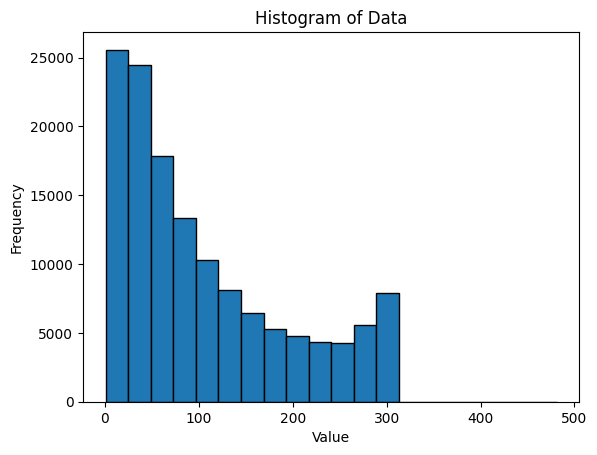

In [38]:
#distribution of text lengths

plt.hist(data, bins=20, edgecolor='black')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Uses langsdetect to fallback on 

In [17]:
#Much slower using langsdetect: Approx 70sec using langsdetect and only 1 sec using label
english_posts_infered = []

for post in all_posts:
    langs = post.get("langs")
    text = post.get("text", "")

    if langs and "en" in langs:
        english_posts_infered.append(post)
    elif langs is None:
        try:
            if detect(text) == "en":
                english_posts_infered.append(post)
        except:
            pass


In [18]:
print("English Posts using langdetect:", len(english_posts_infered),",","English Posts using langs=[en] label:", len(english_posts))

English Posts using langdetect: 144234 , English Posts using langs=[en] label: 138261


In [19]:
english_posts

[{'repo': 'did:plc:f4ogcj35jkjoabckxzcmb25i',
  'timestamp': '2025-03-24T15:37:26.440Z',
  'seq': 6931993625,
  'text': 'Youch, I had a conversation with the Dr about medication and they were keen to prescribe but suggested some ahem lifestyle mods which seem to be keeping things at bay and are annoyingly sensible for a middle aged man',
  'langs': ['en'],
  'cid': 'bafyreifibyvzeip6pi4pthllr4zi5eus4mr2qyrp4vc4cqwdr6hhcyqxru',
  'uri': 'at://did:plc:f4ogcj35jkjoabckxzcmb25i/app.bsky.feed.post/3ll53ksfkl22m'},
 {'repo': 'did:plc:dngnuooilmgmuhh44xuxhqzx',
  'timestamp': '2025-03-24T15:37:26.446Z',
  'seq': 6931993627,
  'text': 'My latest article, on Rafiq Bhatia!',
  'langs': ['en'],
  'cid': 'bafyreidwtsgjl4bslf55fd4p545k2nynsgsuecigpsboyj5iigovrn3h4i',
  'uri': 'at://did:plc:dngnuooilmgmuhh44xuxhqzx/app.bsky.feed.post/3ll53ktdjkk2h'},
 {'repo': 'did:plc:m6sdeml7krkjv2gqk3dc2hwq',
  'timestamp': '2025-03-24T15:37:26.446Z',
  'seq': 6931993629,
  'text': 'I love how Zane never wears pa

## Save to data/filtered_english

In [ ]:
output_directory = "/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/filtered"
output_file = os.path.join(output_directory, "english_posts.json")

with open(output_file, "w") as f:
    json.dump(english_posts, f, indent=2)

print(f"Saved {len(english_posts)} English posts to: {output_file}")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/filtered\\english_posts.json'